# Цифровая обработка сигналов - 4

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Сигналы

В предыдущих частях мы узнали, что *сигнал* - это физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Сигналы бывают – *случайные* и *детерминированные*. 

**Случайным** сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.


Случайные сигналы делятся на два класса: 1) шумы - беспорядочные колебания, состоящие из набора разных частот и амплитуд, 2) сигналы, несущие информацию, для обработки которых требуется прибегать к вероятностным методам. 

Случайные сигналы характеризуются **плотностью распределения вероятностей**. Плотность верноятности это один из способов задания распределения случайных величин.  Плотность вероятности - неотрицательная функция при любых значениях дискретного сигнала. Для аналоговых случайных сигналов интеграл от функции сигнала во всем диапазоне значений стремится к единице. Для дискретных случайных величин **не** существует функции плотности распределения вероятностей, т.к. дискретная случайная величина не является непрерывной функцией. Однако, математический аппарат позволяет вычислять приближенные значения функции.

Простые примеры дискретных случайных величин:
- количество выпавших орлов и количество выпавших решек при броске монеты счетное число N раз,
- число попаданий в мишень при ограниченном числе выстрелов.
- погрешности измерений приборов

## Случайные сигналы

Плотность вероятности случайного сигнала позволяет определить математические моменты разного порядка:

- **Математическое ожидание**: среднее значение последовательности случайных величин

$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$

Под математическим ожиданием в теории сигналов зачастую понимают смещение сигнала по уровню относительно нуля (постоянная составляющая). 

В python для вычисления математического ожидания используется метод `mean()`

- **Дисперсия**: среднее значение квадратов разностей между значениями последовательности и её средним значением

$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

В литературе часто используется термин **среднеквадратическое отклонение**. Эта величина равна квадратному корню из дисперсии сигнала.

В python для вычисления дисперсии используется метод - `var()`, а для поиска среднеквадратического отклонения используется метод - `std()`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft

%matplotlib inline

Случайный дискретный сигнал при $N = 100000$ отсчётов и его плотность вероятности:

Mean of the signal: -0.032692104037689
Std. of the signal: 10.020365002664889


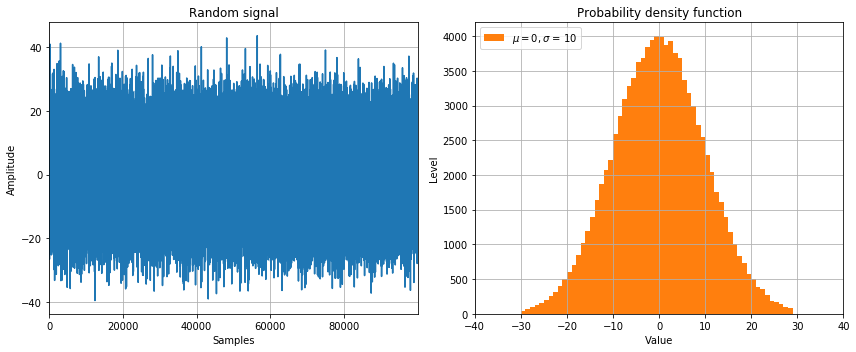

In [2]:
N = 100000

# Random signal
m, s = 0, 10
np.random.seed(2)
sig = np.random.normal(m, s, N)

# Create hist for PDF
hist, _ = np.histogram(sig, bins=list(range(0, 256)))

# Plot figure
fig = plt.figure(1, figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(sig, color='C0')
plt.xlim([0, N-1])
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Probability density function')
plt.xlabel('Value')
plt.ylabel('Level')
plt.xlim([-4*s, 4*s])
plt.hist(sig, bins=list(range(-s*3, s*3)), color='C1', label=r'$\mu = %d, \sigma$ = %d' % (m, s))
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()

print('Mean of the signal:', np.mean(sig))
print('Std. of the signal:', np.std(sig))

### Нормальное распределение

Согласно **центральной предельной теореме**, сумма большого числа слабо зависимых случайных величин имеет распределение близкое к **нормальному**. При этом, случайные величины распределены в рамках определенного масштаба, то есть ни одно из значений не вносит существенного вклада в конечную сумму.

Нормальное распределение (распределение Гаусса) - распределение вероятностей, которое задаётся функцией:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

где $\mu$ - математическое ожидание (среднее значение случайного процесса), а $\sigma$ - среднеквадратическое отклонение.

Нормальное распределение считается **стандартным**, если $\mu = 0, \sigma = 1$.

#### Правило "трех сигм" $3\sigma$

Правило трех сигм гласит, что с вероятностью $P = 0.997$ значения нормально распределенной последовательности лежат в интервале утроенного значения среднеквадратического отклонения. Иными словами, практически все значения случайного процесса лежат в интервале трех сигм, то есть в диапазоне $(x-3\sigma, x+3\sigma)$. 

Ниже представлены графики плотности вероятности и функции распределения нормального закона распределения при различных параметрах математического ожидания и дисперсии. 

Для построения графиков используется метод `norm(mu, sigma)` из пакета `numpy.stats` , а не функция `randn()` из пакета `numpy.random`. Это связано с тем, что у `norm()` возвращает объект, у которого есть методы PDF - плотность вероятности и CDF - функции распределения случайной величины.


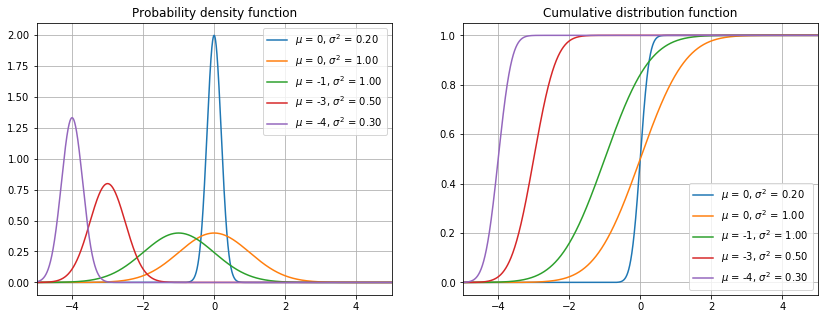

In [3]:
from scipy.stats import norm

# Gaussian parameters
mu = [0, 0, -1, -3, -4]
sg = [0.2, 1, 1, 0.5, 0.3]

# Create Normal distributions
pxn = [norm(mu[i], sg[i]) for i in range(5)]

tt = np.linspace(-5, 5, N)
# Plot PDF and CDF
fig = plt.figure(1, figsize=(14, 5))

plt.subplot(1,2,1)
plt.title('Probability density function')
for i in range(5):
    plt.plot(tt, pxn[i].pdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='upper right')
plt.xlim([-5, 5])
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Cumulative distribution function')
for i in range(5):
    plt.plot(tt, pxn[i].cdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='lower right')
plt.xlim([-5, 5])
plt.grid(True)

### Длина случайного процесса

На основании центральной предельной теоремы, чем больше длительность случайного процесса, тем сильнее он похож на нормальное (Гауссовское) распределение. Можно показать, что при увеличении длины сигнала, функция плотности вероятности стремится к функции нормального распределения.

Зададим длину случайной последовательности $N = 100, 1000, 10000, 100000$ отсчётов. На приведенных ниже графиках показано, как длина случайного процесса влияет на форму графика плотности вероятности.

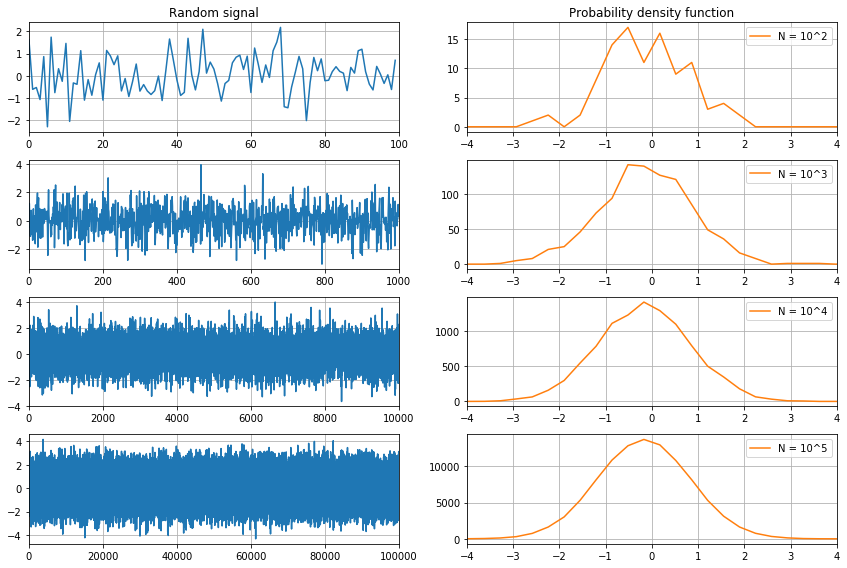

In [4]:
N = 10 ** np.arange(2,6)

# Set random seed
np.random.seed(1)

plt.figure(figsize=(12, 8))
for i in range(len(N)):

    # create random signal
    dat = np.random.normal(size=N[i])
    # hist and bins
    hist, bins = np.histogram(dat, np.linspace(-5, 5, 30))
    # probability density function
    pdf = norm.pdf(bins)
    
    plt.subplot(len(N), 2, 2*i+1)
    if i == 0:
        plt.title('Random signal')
    plt.plot(dat)
    plt.xlim([0, dat.size])
    plt.grid(True)
    
    plt.subplot(len(N), 2, 2*i+2)
    if i == 0:
        plt.title('Probability density function')
    plt.plot(bins[:-1], hist, color='C1', label='N = 10^{}'.format(int(np.log10(N[i]))))
    plt.xlim([-4, 4])
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()

### Python библиотека Random

Python библиотека numpy содержит пакет **random**, который содержит набор функций математической статистики. Для импорта пакета в проект необходимо выполнить команду:

```python
from numpy.random import *
# or
import numpy as np
```

Кроме того, в библиотеке scipy содержится пакет **stats*, который дополняет (и частично переопределяет) функционал пакета random. Приведем список основных функций из пакета random:

| **Function**      | **Description** |
| --- | --- | 
| `rand(d0, d1, ..., dn)`               | Равномерное распределение (возвращает N-мерный массив) |
| `randn(d0, d1, ..., dn)`              | Стандартное нормальное распределение (возвращает N-мерный массив) |
| `randint(low[, high, size, dtype])`   | Массив целочисленных значений в заданном диапазоне |
| `random([size])`                      | Равномерное распределение в интервале $[0.0, 1.0)$ |
| `shuffle(x)`                          | Перестановка элементов последовательности "на лету" |
| `permutation(x)`                      | Перестановка элементов массива или возврат их индексов |
| `normal([loc, scale, size])`          | Массив случайных чисел, распределенных по нормальному закону |
| `pareto(a[, size])`                   | Массив случайных чисел, распределенных по закону Парето |
| `poisson([lam, size])`                | Массив случайных чисел, распределенных по закону Пуассона  |
| `rayleigh([scale, size])`             | Массив случайных чисел, распределенных по Рэлеевскому закону |
| `seed([seed])`                        | Инициализация псевдослучайной величины |

____

В задачах цифровой обработки сигналов случайные процессы играют важную роль. С помощью случайных величин можно моделировать воздействие реальной среды на прохождение сигнала от источника к приёмнику данных. Зачастую, при прохождении сигнала через какое-то шумящее звено, к сигналу добавляется так называемый **белый шум**. Как правило, спектральная плотность такого шума равномерно (одинаково) распределена на всех частотах, а значения шума во временной области распределены нормально (Гауссовский закон распределения). Поскольку белый шум физически добавляется к амплитудам сигнала в выбранные отсчеты времени, он называется **аддитивный**. Таким образом, основной источник шумов носит название *аддитивный белый гауссовский шум* (AWGN - Additive white Gaussian noise). 

Стоит отметить, что термин *белый* связан с тем, что спектральные составляющие равномерно распределены по всему диапазону частот. Изучение особенностей шумов выходит за рамки этого материала, но в последующих лекциях планируется вернуться к вопросам влияния шумов на протекающие процессы в устройствах, в частности в цифровых. Поскольку частотные значения распределены равномерно, автокорреляционная функция (АКФ) белого шума в идеале стремится к **дельта-функции**. 

Приведем график белого шума во временной области, а также построим его АКФ. В качестве генератора белого шума воспользуемся функцией `randn()` из пакета *random*

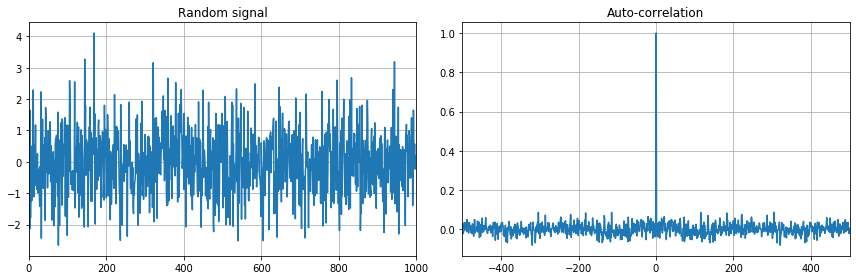

In [5]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)

N = 1000
# Random signal
np.random.seed(2)
dat = np.random.randn(N)

# ACF: Auto-correlation
cfx = auto_corr(dat)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.plot(dat)
plt.xlim([0, dat.size])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Auto-correlation')
plt.plot(np.linspace(-N//2, N//2, N), cfx)
plt.xlim([-N//2, N//2])
plt.grid(True)
plt.tight_layout()